**Final Hypothesis: Reducing Travel (i.e. staying at home) Reduced COVID**
Owner: Colin, Prina

(Prina) 1) Hypothesis 1: Reducing average trip length (more short trips, fewer long trips) reduced the subsequent COVID-19 Case Count
- Regression

(Colin) 2) Hypothesis 2: Staying at home (higher % staying at home) reduced the subsequent COVID-19 Case Count
- Regression

In [48]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from pathlib import Path
import os

In [105]:
#DATA READ IN
path = "../output_data/consolidated_new.csv"
consolidated = pd.read_csv(path)

path = "../output_data/national_covid.csv"
nation = pd.read_csv(path)

In [123]:
#WEEKLY GROUPING
df = consolidated
df["Date"] = df["Date"].astype('datetime64[ns]')
weekly_consolidated = df.groupby("state").resample('W-Wed', label='right', closed = 'right', on='Date').sum().reset_index().sort_values(by='Date')

In [124]:
#DATA CLEANUP, drop partial weeks
weekly_consolidated = weekly_consolidated.drop(['tot_cases%',"tot_death%","Population Staying at Home%","Population Not Staying at Home%"],axis = 1,inplace=False)
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-01-02"]
weekly_consolidated = weekly_consolidated[weekly_consolidated["Date"] != "2019-11-24"]

In [125]:
weekly_consolidated["%HOME"] = weekly_consolidated["Population Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["%AWAY"] = weekly_consolidated["Population Not Staying at Home"] / weekly_consolidated["total_population"]
weekly_consolidated["DEATHS"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000
weekly_consolidated["CASES"] = weekly_consolidated["new_death"] / weekly_consolidated["total_population"] * 100000

In [245]:
pre_covid = weekly_consolidated[weekly_consolidated["Date"] <= "2020-03-04"]
post_covid = weekly_consolidated[weekly_consolidated["Date"] > "2020-03-04"]
pre_vaccine = post_covid[post_covid["Date"] <= "2020-12-30"]

pre_covid_avg = pre_covid.groupby("state").mean()
post_covid_avg = post_covid.groupby("state").mean()
pre_vaccine_avg = pre_vaccine.groupby("state").mean()

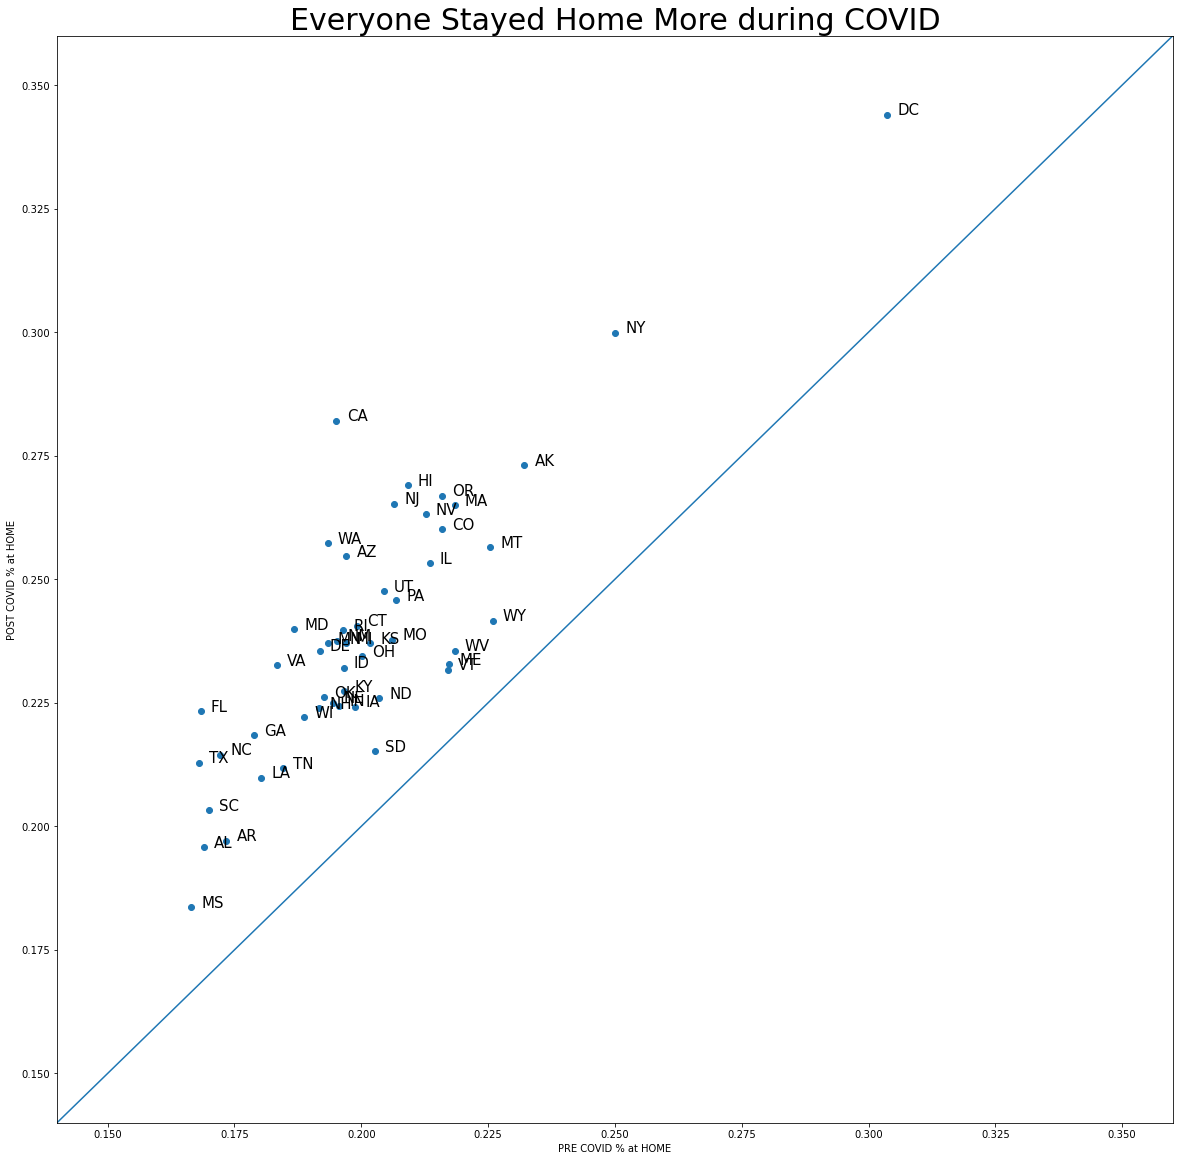

In [246]:
x = pre_covid_avg["%HOME"]
y = post_covid_avg["%HOME"]

plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.axline((0.15,0.15),(.35,.35))
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME")

labels = post_covid_avg.index

plt.title("Everyone Stayed Home More during COVID",size=30)
for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

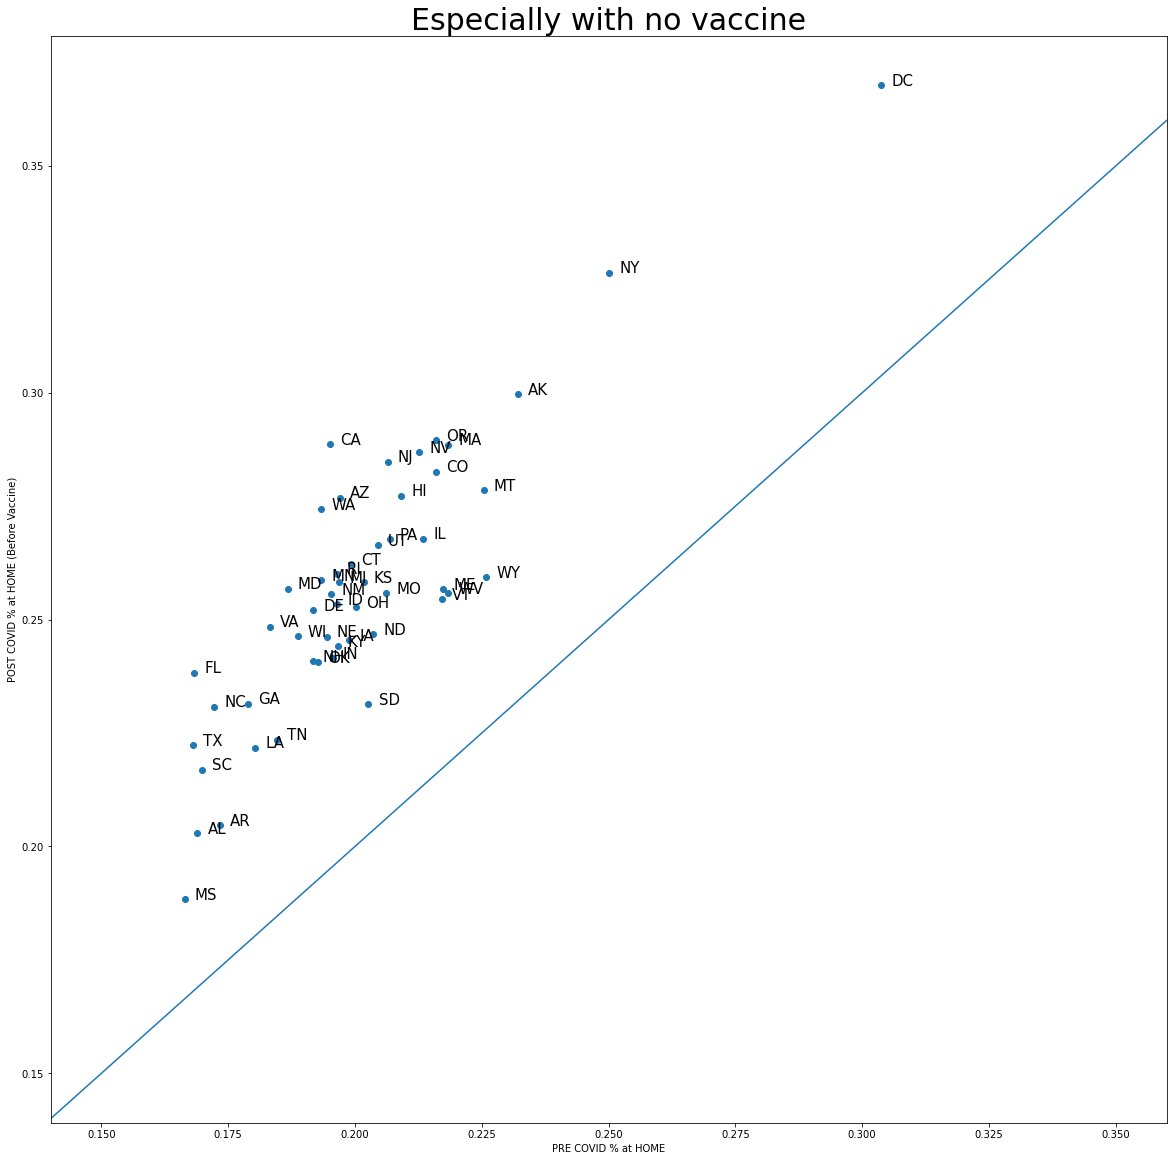

In [248]:
x = pre_covid_avg["%HOME"]
y = pre_vaccine_avg["%HOME"]

plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.axline((0.15,0.15),(.35,.35))
plt.xlabel("PRE COVID % at HOME")
plt.ylabel("POST COVID % at HOME (Before Vaccine)")

labels = post_covid_avg.index

plt.title("Especially with no vaccine",size=30)
for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)

Text(0.5, 1.0, 'Everyone Stayed Home More during COVID')

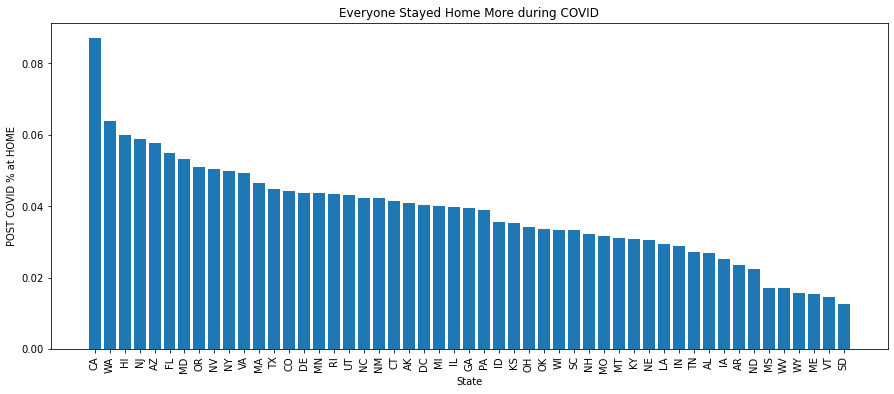

In [209]:
delta = pre_covid_avg["%HOME"] - post_covid_avg["%HOME"]
delta = delta.sort_values(ascending=True)

y=-delta
x=delta.index

plt.figure(figsize=(15,6))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("POST COVID % at HOME")
plt.title("Everyone Stayed Home More during COVID")

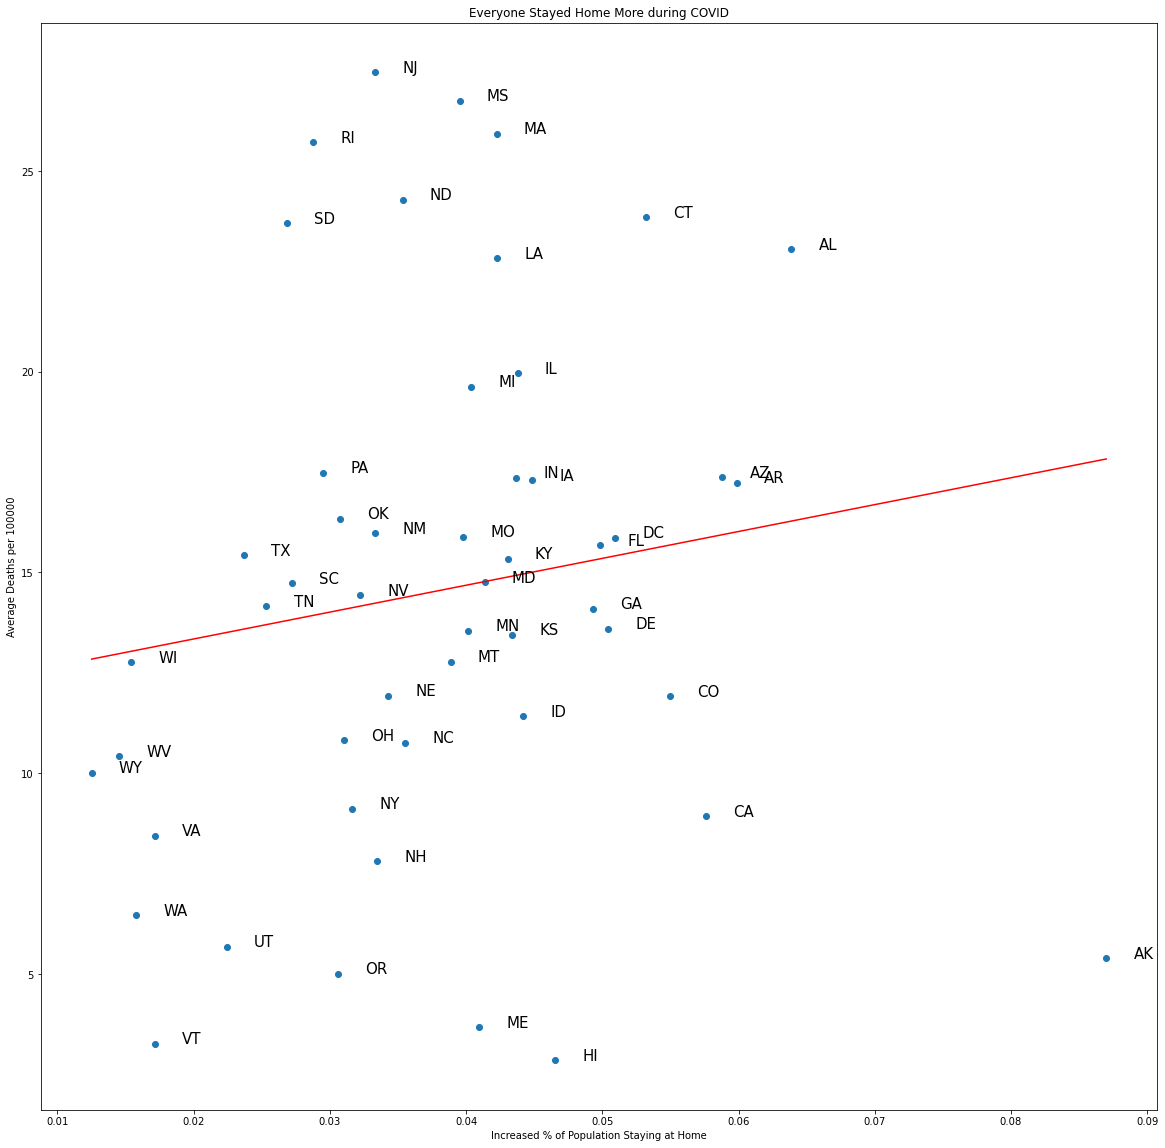

In [254]:
#NOTE: 43 weeks in "pre-vaccine", 90 weeks in "post-covids"

infections = pre_vaccine_avg["DEATHS"] * 43 #multiply 90 because 90 weeks
x = -delta
y = infections
plt.figure(figsize=(20,20))
plt.scatter(x,y)
plt.xlabel("Increased % of Population Staying at Home")
plt.ylabel("Average Deaths per 100000")
plt.title("Everyone Stayed Home More during COVID")
labels = post_covid_avg.index

m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

for i, label in enumerate(labels):
    plt.text(x[i] + .002, y[i],label,size=15)


In [251]:
pre_vaccine.groupby("state").count()

,Date,tot_cases,new_case,tot_death,new_death,Population Staying at Home,Population Not Staying at Home,Number of Trips,Number of Trips <1,Number of Trips 1-3,...,Number of Trips 25-50,Number of Trips 50-100,Number of Trips 100-250,Number of Trips 250-500,Number of Trips >=500,total_population,%HOME,%AWAY,DEATHS,CASES
state,,,,,,,,,,,,,,,,,,,,,
AK,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
AL,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
AR,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
AZ,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
CA,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
CO,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
CT,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
DC,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
DE,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
